In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

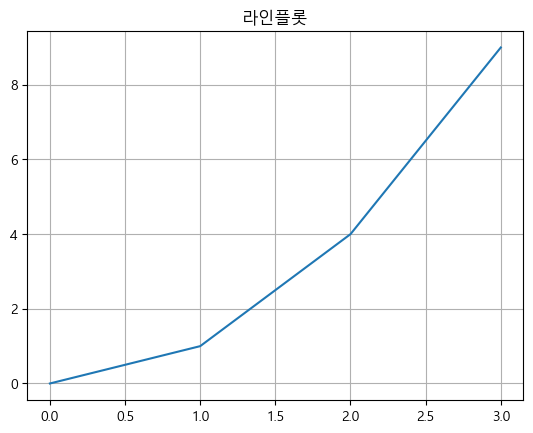

In [2]:
plt.plot([0,1,2,3], [0,1,4,9])
plt.title('라인플롯')
plt.grid()
plt.show()

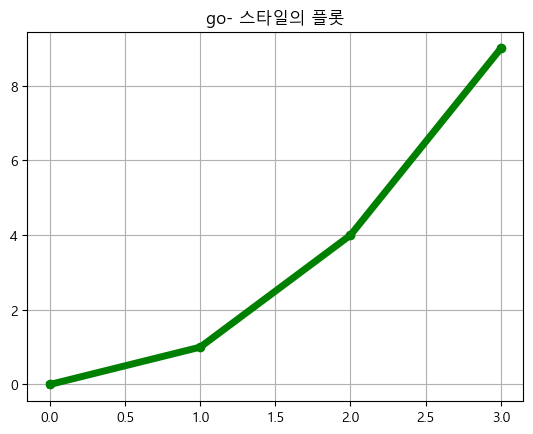

In [6]:
plt.plot([0,1,4,9], 'go-', lw=5)
plt.title('go- 스타일의 플롯')
plt.grid()
plt.show()

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('./02.Pandas/data/법정동코드 전체자료.txt', encoding='euc-kr', sep='\t')
df1.isna().sum()

법정동코드    0
법정동명     0
폐지여부     0
dtype: int64

In [2]:
df1[df1.법정동명.str.contains('경기도 수원시')]

,법정동코드,법정동명,폐지여부
4819,4111000000,경기도 수원시,존재
4820,4111000100,경기도 수원시 반정동,폐지
4821,4111010100,경기도 수원시 팔달로1가,폐지
4822,4111010200,경기도 수원시 팔달로2가,폐지
4823,4111010300,경기도 수원시 남창동,폐지
...,...,...,...
5023,4111710300,경기도 수원시 영통구 이의동,존재
5024,4111710400,경기도 수원시 영통구 하동,존재
5025,4111710500,경기도 수원시 영통구 영통동,존재
5026,4111710600,경기도 수원시 영통구 신동,존재


In [3]:
df2 = df1[df1.법정동명.str.contains('경기도 수원시 장안구')]
sr = df2.법정동명.str.split()
temp = []
for i in sr:
    temp.append(i[-1])
set(temp)

{'구천동',
 '남수동',
 '남창동',
 '남향동',
 '매향동',
 '북수동',
 '상광교동',
 '송원동',
 '송죽동',
 '신안동',
 '신풍동',
 '연무동',
 '영동',
 '영화동',
 '우만동',
 '율전동',
 '이목동',
 '이의동',
 '장안구',
 '장안동',
 '정자동',
 '조원동',
 '중동',
 '지동',
 '지만동',
 '천천동',
 '파장동',
 '팔달동',
 '팔달로1가',
 '팔달로2가',
 '팔달로3가',
 '하광교동',
 '하동',
 '화서1동',
 '화서2동',
 '화서동'}